# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Estatística para Ciência de Dados</span>

## <span style="color:blue">Semana 8</span>
**Material Produzido por Mariana Cúri**<br>
**Cemeai - ICMC/USP São Carlos**

<font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

Os 4 gráficos abaixo representam análises de resíduos em função dos valores preditos para verificação do ajuste de modelos de regressão linear. 
<br>
<img src='./img/graficos-avaliacao-1.gif'>
<br>
Com base nessas ilustrações, responda as questões de 1 a 5 abaixo.

### Exercício 1
O gráfico (a) exemplifica um padrão de comportamento desejado não revelando nenhum problema com as suposições do modelo.

Escolha uma opção:<br>
(<font color='blue'><b>X</b></font>) Verdadeiro<br>
() Falso<br>

### Exercício 2
O gráfico (b) indica um problema de heterocedasticidade

Escolha uma opção:<br>
(<font color='blue'><b>X</b></font>) Verdadeiro<br>
() Falso<br>

### Exercício 3
O gráfico (c) representa um problema de associação não linear entre a resposta e os preditores

Escolha uma opção:<br>
() Verdadeiro<br>
(<font color='blue'><b>X</b></font>) Falso<br>

### Exercício 4
O gráfico (d) indica desvios da normalidade da variável resposta

Escolha uma opção:<br>
() Verdadeiro<br>
(<font color='blue'><b>X</b></font>) Falso<br>

### Exercício 5
O gráfico (d) indica não linearidade, talvez devido à ausência de algum preditor importante no modelo.

Escolha uma opção:<br>
(<font color='blue'><b>X</b></font>) Verdadeiro<br>
() Falso<br>

### Exercício 6
Com o conjunto de dados do estudo do Prestígio das ocupações profissionais usados na aula da semana 7 e ajuste os modelos de regressão linear múltipla com as seguintes variáveis explicativas (considerando Prestige como a variável resposta):

1) Education e Income 

2) Education e Income e respectiva interação

3) Education e Income, ambas padronizadas

4) Education e Income, ambas padronizadas, e respectiva interação

Ajuste os modelos padronizados com e depois sem intercepto (basta incluir -1 no modelo, junto com os preditores, na função usada em aulas passadas). Calcule o VIF de cada preditor com o comando:

statsmodels.stats.outliers_influence.variance_inflation_factor

Assinale a alternativa <font color='red'><b>INCORRETA</b></font>.


Escolha uma:<br><br>
<b>a. No modelo de regressão sem interação, com as variáveis padronizadas e sem intercepto, pode-se dizer que a cada ano de estudo adicional, o prestígio da ocupação profissional aumenta em 0,69 unidades, em média<font color='red'><b> F</b></font><br><br><br></b>
b. Os coeficientes de determinação dos modelos 2 e 4 (com intercepto) são exatamente iguais.<font color='green'><b> V</b></font><b> No caso, obtivemos - Log-Likelihood: -331.07</b><br><br>
c. O modelo de regressão padronizado deve ser ajustado sem intercepto quando as médias de todas as variáveis explicativas no modelo são iguais a 0, fazendo com que a função predita passe pela origem.<font color='green'><b> V</b></font><br><br><br><br>
d. A padronização das variáveis resolveu o problema da multicolinearidade, quando este existia<font color='green'><b> V</b></font><br><br>
e. O modelo sem interação com os preditores não padronizados não apresentou problema de multicolinearidade. Este problema apareceu quando o termo de interação foi inserido.<font color='red'><b> F</b></font><br><br><br><br>

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

df = pd.read_csv('.\data\Prestigio.csv', sep=',', na_values=',',encoding='unicode_escape')
df = df.dropna()
df = pd.concat([df, pd.get_dummies(df['type'].astype('category'), prefix = 'd')], axis = 1) 
print(df.head())
df.describe()

            occupation  education  income  women  prestige  census  type  \
0   gov.administrators      13.11   12351  11.16      68.8    1113  prof   
1     general.managers      12.26   25879   4.02      69.1    1130  prof   
2          accountants      12.77    9271  15.70      63.4    1171  prof   
3  purchasing.officers      11.42    8865   9.11      56.8    1175  prof   
4             chemists      14.62    8403  11.68      73.5    2111  prof   

   d_bc  d_prof  d_wc  
0     0       1     0  
1     0       1     0  
2     0       1     0  
3     0       1     0  
4     0       1     0  


,education,income,women,prestige,census,d_bc,d_prof,d_wc
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,10.795102,6938.857143,28.985714,47.327551,5400.061224,0.448980,0.316327,0.234694
std,2.748937,4228.132538,31.382016,17.094907,2684.302381,0.499947,0.467433,0.425986
min,6.380000,1656.000000,0.000000,17.300000,1113.000000,0.000000,0.000000,0.000000
25%,8.445000,4250.500000,3.267500,35.375000,3115.500000,0.000000,0.000000,0.000000
50%,10.605000,6035.500000,14.475000,43.600000,5131.500000,0.000000,0.000000,0.000000
75%,12.755000,8226.250000,52.202500,59.900000,8328.000000,1.000000,1.000000,0.000000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000,1.000000,1.000000,1.000000


In [2]:
import statsmodels.formula.api as smf

# Função com o método de seleção Forward, usando o R2 ajustado para seleção
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1 ".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

data = df.drop(['occupation', 'census','type','d_bc'], axis=1).astype('float64')

#Executa a função para seleção de variáveis pelo método forward, usando R2 ajustado como critério de seleção
model = forward_selected(df, 'prestige')

data.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))


,education,income,women,prestige,d_prof,d_wc
0,13.11,12351.0,11.16,68.8,1.0,0.0
1,12.26,25879.0,4.02,69.1,1.0,0.0
2,12.77,9271.0,15.70,63.4,1.0,0.0
3,11.42,8865.0,9.11,56.8,1.0,0.0
4,14.62,8403.0,11.68,73.5,1.0,0.0


In [3]:
from statsmodels.formula.api import ols

# Ajusta o modelo: Education e Income
print('Modelo 1 - Education e Income')
print()
mod1 = ols('df.prestige ~ df.education + df.income',data=df)
res1 = mod1.fit()
print(res1.summary())

Modelo 1 - Education e Income

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        21:17:11   Log-Likelihood:                -334.33
No. Observations:                  98   AIC:                             674.7
Df Residuals:                      95   BIC:                             682.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -

In [4]:
# Ajusta o modelo: Education, Income e respectiva interação
print('Modelo 2 - Education e Income e respectiva interação')
print()
#trocamos o + por * para incluir a interação.
mod2 = ols('df.prestige ~ df.education * df.income',data=df)
res2 = mod2.fit()
print(res2.summary())

Modelo 2 - Education e Income e respectiva interação

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.43e-35
Time:                        21:17:11   Log-Likelihood:                -331.07
No. Observations:                  98   AIC:                             670.1
Df Residuals:                      94   BIC:                             680.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [5]:
# Ajusta o modelo: Education e Income ambas padronizadas
print('Modelo 3 - Education e Income, ambas padronizadas - Com Intercepto')
print()

#padronização (média dividido pelo desvio padrão)
income_p = (df.income-np.mean(df.income))/(np.std(df.income))
education_p = (df.education-np.mean(df.education))/(np.std(df.education))

mod3c = ols('df.prestige ~ education_p + income_p',data=df)
res3c = mod3c.fit()
print(res3c.summary())

Modelo 3 - Education e Income, ambas padronizadas - Com Intercepto

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        21:17:12   Log-Likelihood:                -334.33
No. Observations:                  98   AIC:                             674.7
Df Residuals:                      95   BIC:                             682.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [6]:
# Ajusta o modelo: Education e Income ambas padronizadas
print('Modelo 3 - Education e Income, ambas padronizadas - Sem Intercepto')
print()

#padronização (média dividido pelo desvio padrão)
income_p = (df.income-np.mean(df.income))/(np.std(df.income))
education_p = (df.education-np.mean(df.education))/(np.std(df.education))

mod3s = ols('df.prestige ~ education_p + income_p -1',data=df)
res3s = mod3s.fit()
print(res3s.summary())

Modelo 3 - Education e Income, ambas padronizadas - Sem Intercepto

                                 OLS Regression Results                                
Dep. Variable:            df.prestige   R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              4.927
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                     0.00918
Time:                        21:17:12   Log-Likelihood:                         -518.21
No. Observations:                  98   AIC:                                      1040.
Df Residuals:                      96   BIC:                                      1046.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>

In [7]:
# Ajusta o modelo: Education e Income ambas padronizadas e respectiva interação
print('Modelo 4 - Education e Income, ambas padronizadas e respectiva interação - Com Intercepto')
print()

mod4c = ols('df.prestige ~ education_p * income_p',data=df)
res4c = mod4c.fit()
print(res4c.summary())

Modelo 4 - Education e Income, ambas padronizadas e respectiva interação - Com Intercepto

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.43e-35
Time:                        21:17:12   Log-Likelihood:                -331.07
No. Observations:                  98   AIC:                             670.1
Df Residuals:                      94   BIC:                             680.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [8]:
# Ajusta o modelo: Education e Income ambas padronizadas e respectiva interação
print('Modelo 4 - Education e Income, ambas padronizadas e respectiva interação - Sem Intercepto')
print()

mod4s = ols('df.prestige ~ education_p * income_p -1',data=df)
res4s = mod4s.fit()
print(res4s.summary())

Modelo 4 - Education e Income, ambas padronizadas e respectiva interação - Sem Intercepto

                                 OLS Regression Results                                
Dep. Variable:            df.prestige   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                              15.85
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                    1.96e-08
Time:                        21:17:12   Log-Likelihood:                         -503.12
No. Observations:                  98   AIC:                                      1012.
Df Residuals:                      95   BIC:                                      1020.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           co

In [9]:
from statsmodels.stats import outliers_influence

#Calculando o VIF

#Modelo 1:
vif = [outliers_influence.variance_inflation_factor(mod1.exog, i) for i in range(len(mod1.exog_names))]
feat = mod1.exog_names
print('Modelo 1:')
print(feat,vif)
print()
#Modelo 2:
vif = [outliers_influence.variance_inflation_factor(mod2.exog, i) for i in range(len(mod2.exog_names))]
feat = mod2.exog_names
print('Modelo 2:')
print(feat,vif)
print()

#Modelo 3:
vif = [outliers_influence.variance_inflation_factor(mod3c.exog, i) for i in range(len(mod3c.exog_names))]
feat = mod3c.exog_names
print('Modelo 3: Com Intercepto')
print(feat,vif)
print()

#Modelo 3:
vif = [outliers_influence.variance_inflation_factor(mod3s.exog, i) for i in range(len(mod3s.exog_names))]
feat = mod3s.exog_names
print('Modelo 3: Sem Intercepto')
print(feat,vif)
print()

#Modelo 4:
vif = [outliers_influence.variance_inflation_factor(mod4c.exog, i) for i in range(len(mod4c.exog_names))]
feat = mod4c.exog_names
print('Modelo 4: Com Intercepto')
print(feat,vif)
print()

#Modelo 4:
vif = [outliers_influence.variance_inflation_factor(mod4s.exog, i) for i in range(len(mod4s.exog_names))]
feat = mod4s.exog_names
print('Modelo 4: Sem Intercepto')
print(feat,vif)
print()

Modelo 1:
['Intercept', 'df.education', 'df.income'] [17.147364341760714, 1.4916209499947803, 1.49162094999478]

Modelo 2:
['Intercept', 'df.education', 'df.income', 'df.education:df.income'] [80.32415647724467, 4.51033604833944, 33.2769479760182, 47.0511368988898]

Modelo 3: Com Intercepto
['Intercept', 'education_p', 'income_p'] [1.0, 1.4916209499947803, 1.4916209499947806]

Modelo 3: Sem Intercepto
['education_p', 'income_p'] [1.4916209499947806, 1.4916209499947803]

Modelo 4: Com Intercepto
['Intercept', 'education_p', 'income_p', 'education_p:income_p'] [1.4424955411399147, 1.5218559417991762, 2.624254795520727, 1.950390018007004]

Modelo 4: Sem Intercepto
['education_p', 'income_p', 'education_p:income_p'] [1.512581147750749, 2.2768114848860654, 1.6588512691387367]



### Exercício 7
Use o código abaixo para simular os dados que usamos do trabalho do Sildenafil e encontrar um estimador bayesiano da proporção, na população, de homens com pelo menos 60% de tentativas bem sucedidas.<br>
<img src='./img/grafico-avaliacao-7.png'>

Assinale a alternativa <font color='green'><b>CORRETA</b></font>

Escolha uma:<br>
<b>a. A estimativa do MAP é mais parecida com a de MV do que com a da EAP</b><br>
b. Os estimadores de MV e MAP maximizam exatamente a mesma função, independentemente dos parâmetros da priori<br>
c. Se usarmos exatamente a mesma priori usada na vídeo aula (Beta(2,3), ao invés da Beta(1,1)), os estimadores MAP e EAP são iguais.<br>
d. A estimativa do MAP foi bem diferente das de MV e EAP<br>
e. A estimativa do MAP é mais parecida com a da EAP do que com a de MV<br>

In [36]:
import pymc3

data = np.concatenate((np.repeat(1,183),np.repeat(0,379-183)),axis=0)

def create_model_pymc3(data):
    with pymc3.Model() as model:
        p = pymc3.Beta('theta', alpha=1, beta=1)
        bernoulli = pymc3.Bernoulli('bernoulli',p=p,observed=data)
    return model


model = create_model_pymc3(data)

map_estimate = pymc3.find_MAP(model=model)
map_estimate #MAP (máximo da posteriori)

logp = -262.7, ||grad|| = 6.5: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 73.22it/s]


{'theta_logodds__': array(-0.06862851), 'theta': array(0.4828496)}

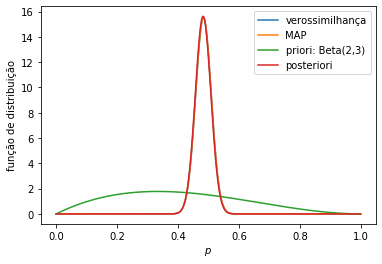

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.stats import beta
from scipy.stats import norm

x_axis = np.arange(0, 1, 0.002)
dp = np.sqrt(0.483*(1-0.483)/379)
a = 2
b = 3
prior = beta(a,b)
posteriori = beta(183+a,379-183+b) #EAP (esperança da Posteriori)

# Média = 0.483, desvio Padrão = dp, apenas para ilustar
plt.plot(x_axis, norm.pdf(x_axis,0.483,dp), label="verossimilhança") #MV (máxima verossimilhança)
plt.plot(x_axis, norm.pdf(x_axis,map_estimate['theta'],dp), label="MAP") #MAP (máxima da posteriori)
plt.plot(x_axis, prior.pdf(x_axis),label="priori: Beta(2,3)") #priori
plt.plot(x_axis, posteriori.pdf(x_axis),label="posteriori") #EAP (esperança da Posteriori)
plt.xlabel("$p$")
plt.ylabel("função de distribuição")
plt.legend()
plt.show()

### Exercício 8
Complemente o código do exercício anterior com:

___________________________________________________________

 Usa MCMC para gerar observações da posteriori (método de cálculo da posteriori por simulação)

with model:

    trace = pymc3.sample(1000, tune=1000, cores=1)

Faz o gráfico da posteriori, calcula sua média e o intervalo de credibilidade

pymc3.plot_posterior(trace);

____________________________________________________________

Qual a afirmativa <font color='green'><b>CORRETA</b></font>?<br>

Escolha uma:<br><br>
<b>a. Os resultados pela simulação de MCMC (com 1000 observações geradas, como o código do enunciado, pelo menos) são similares aos obtidos teoricamente (apresentados em aula)<br><br></b>
b. A média da posteriori calculada no MCMC com o código acima é o estimador de MV de p<br><br>
c. O intervalo de credibilidade calculado tem 99% de probabilidade de conter o verdadeiro valor da probabilidade de sucesso, p<br><br>
d. Na inferência frequentista, o parâmetro p da Bernoulli segue distribuição Beta(1,1), ou seja, Uniforme.<br><br>
e. Se gerarmos poucas observações da posteriori simuladas por MCMC (10, por exemplo, ao invés de 1000), os resultados ficam bem piores. Faça isso com a seguinte modificação: trace = pymc3.sample(10, tune=1000, cores=1)<br><br>

logp = -262.7, ||grad|| = 6.5: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 71.35it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████| 2000/2000 [01:16<00:00, 25.99it/s]


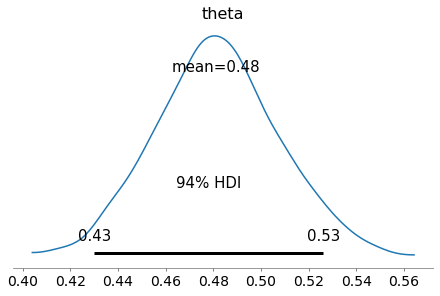

In [38]:
import pymc3

data = np.concatenate((np.repeat(1,183),np.repeat(0,379-183)),axis=0)

def create_model_pymc3(data):
    with pymc3.Model() as model:
        p = pymc3.Beta('theta', alpha=1, beta=1)
        bernoulli = pymc3.Bernoulli('bernoulli',p=p,observed=data)
    return model


model = create_model_pymc3(data)

map_estimate = pymc3.find_MAP(model=model)
map_estimate #MAP (máximo da posteriori)

with model:
    trace = pymc3.sample(1000, tune=1000, cores=1)

pymc3.plot_posterior(trace);